In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

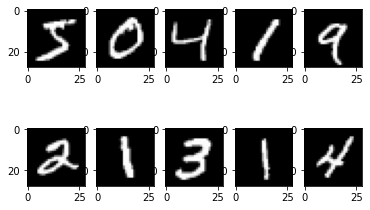

In [8]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
plt.show()

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim,loss=loss,metrics=metrics)
batch_size = 64
epochs = 5

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,shuffle=True,verbose=2)

Epoch 1/5
938/938 - 2s - loss: 0.2988 - accuracy: 0.9163 - 2s/epoch - 2ms/step
Epoch 2/5
938/938 - 1s - loss: 0.1321 - accuracy: 0.9620 - 1s/epoch - 1ms/step
Epoch 3/5
938/938 - 1s - loss: 0.0930 - accuracy: 0.9730 - 1s/epoch - 1ms/step
Epoch 4/5
938/938 - 1s - loss: 0.0709 - accuracy: 0.9786 - 1s/epoch - 1ms/step
Epoch 5/5
938/938 - 1s - loss: 0.0556 - accuracy: 0.9839 - 1s/epoch - 1ms/step


In [12]:
predictions = model.predict(x_test,batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)

157/157 [==============================] - 0s 918us/step
tf.Tensor(
[1.1561906e-06 1.1561906e-06 2.3409937e-05 3.9481168e-04 1.1561906e-06
 1.1561906e-06 1.1561906e-06 9.9956304e-01 1.1561906e-06 1.1852044e-05], shape=(10,), dtype=float32)


In [13]:
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

157/157 - 0s - loss: 0.0847 - accuracy: 0.9741 - 235ms/epoch - 1ms/step


[0.08465839922428131, 0.9740999937057495]